In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_json('news.json',lines=True)

In [3]:
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [4]:
df.shape

(200853, 6)

In [5]:
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [6]:
df['authors'].unique()

array(['Melissa Jeltsen', 'Andy McDonald', 'Ron Dicker', ...,
       'Courtney Garcia, Contributor\nI tell stories and drink wine.',
       'Mateo Gutierrez, Contributor\nArtist',
       'John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff'],
      dtype=object)

In [7]:
df['link'].unique()

array(['https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
       'https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201',
       'https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c',
       ...,
       'https://www.huffingtonpost.com/entry/super-bowl-upsets-the-mos_us_5bb69b1de4b097869fd1b26d',
       'https://www.huffingtonpost.com/entry/aldon-smith-arrested-dui-49ers_us_5bb69b25e4b097869fd1b33c',
       'https://www.huffingtonpost.com/entry/dwight-howard-rips-teammates-magic-hornets_us_5bb69b24e4b097869fd1b331'],
      dtype=object)

In [8]:
coun=df['category'].value_counts()
print(coun)

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

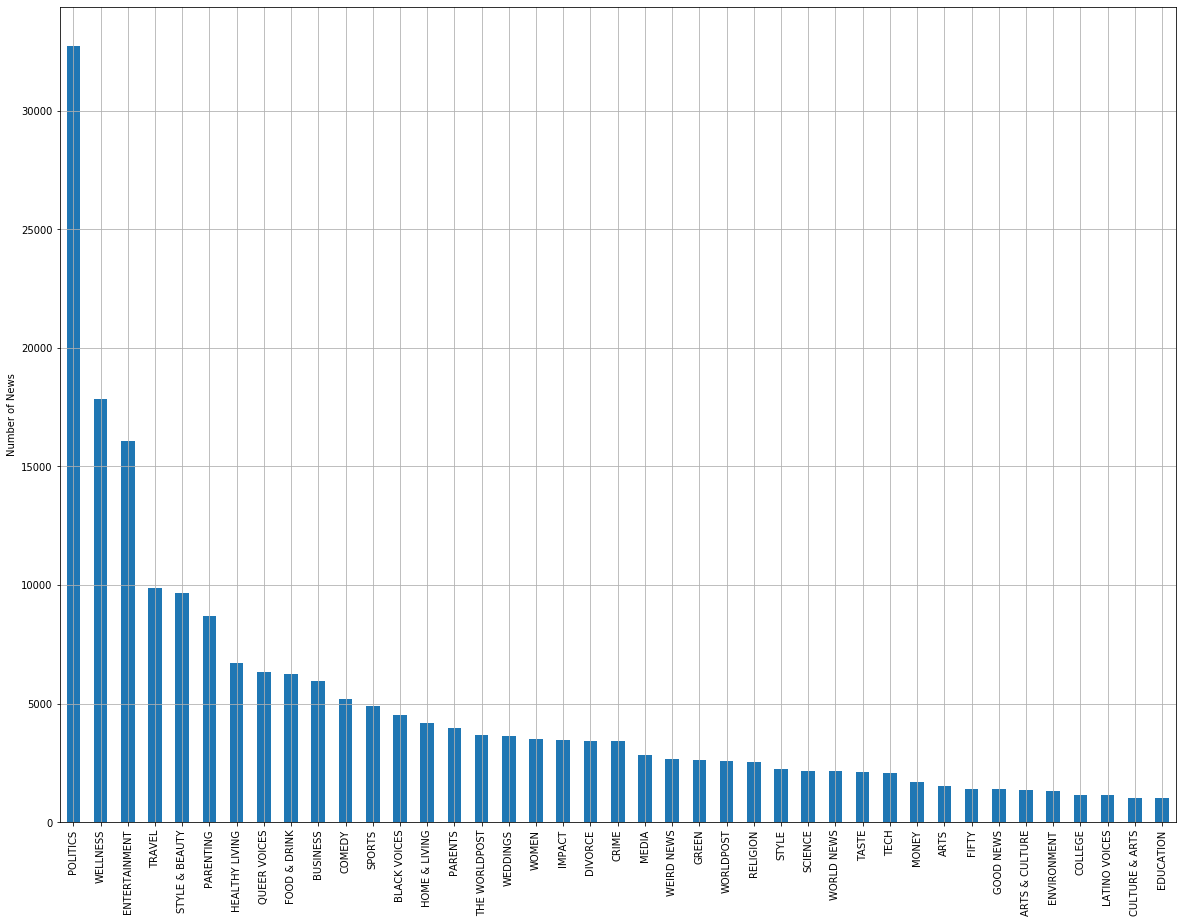

In [9]:
coun.plot( kind='bar', figsize=(20,15))
plt.grid()
plt.ylabel('Number of News')
plt.savefig('bars.pdf')

In [10]:
coun1=df['authors'].value_counts()
print(coun1)

                                                                                          36620
Lee Moran                                                                                  2423
Ron Dicker                                                                                 1913
Reuters, Reuters                                                                           1562
Ed Mazza                                                                                   1322
                                                                                          ...  
Fiona Ma, ContributorChairwoman Emeritus of the California State Board of Equalization        1
Allure, Contributor\nAllure Magazine                                                          1
Tyrie Jenkins, M.D., Contributor\nEye surgeon, ophthalmologist                                1
Madeline Levine, ContributorAuthor                                                            1
Maureen Abood, Contributor\nRose Water &

In [11]:
import numpy as np
import re
import nltk
import pickle
from nltk.corpus import stopwords

In [12]:
df['New']=df['headline']+ ".  " +df["short_description"]

In [13]:
df['New']=df['New'].str.lower()

In [14]:
df['New']

0         there were 2 mass shootings in texas last week...
1         will smith joins diplo and nicky jam for the 2...
2         hugh grant marries for the first time at age 5...
3         jim carrey blasts 'castrato' adam schiff and d...
4         julianna margulies uses donald trump poop bags...
                                ...                        
200848    rim ceo thorsten heins' 'significant' plans fo...
200849    maria sharapova stunned by victoria azarenka i...
200850    giants over patriots, jets over colts among  m...
200851    aldon smith arrested: 49ers linebacker busted ...
200852    dwight howard rips teammates after magic loss ...
Name: New, Length: 200853, dtype: object

In [15]:
df.head()

,category,headline,authors,link,short_description,date,New
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,there were 2 mass shootings in texas last week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,hugh grant marries for the first time at age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,jim carrey blasts 'castrato' adam schiff and d...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,julianna margulies uses donald trump poop bags...


In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [17]:
df['New_without_stopwords'] = df['New'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [18]:
df.head()

,category,headline,authors,link,short_description,date,New,New_without_stopwords
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,there were 2 mass shootings in texas last week...,"2 mass shootings texas last week, 1 tv. left h..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,will smith joins diplo and nicky jam for the 2...,smith joins diplo nicky jam 2018 world cup's o...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,hugh grant marries for the first time at age 5...,hugh grant marries first time age 57. actor lo...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,jim carrey blasts 'castrato' adam schiff and d...,jim carrey blasts 'castrato' adam schiff democ...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...


In [19]:
df['New_without_stopwords'][0]

'2 mass shootings texas last week, 1 tv. left husband. killed children. another day america.'

In [20]:
df['NWSC'] = df['New_without_stopwords'].str.replace('[^\w\s]','')


In [21]:
df['NWSC'][3]

'jim carrey blasts castrato adam schiff democrats new artwork actor gives dems asskicking fighting hard enough donald trump'

In [22]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [23]:
def lemmatize(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [24]:
df['TL'] = df['NWSC'].apply(lemmatize)

In [25]:
df['TL'][3]

['jim',
 'carrey',
 'blast',
 'castrato',
 'adam',
 'schiff',
 'democrat',
 'new',
 'artwork',
 'actor',
 'give',
 'dems',
 'asskicking',
 'fighting',
 'hard',
 'enough',
 'donald',
 'trump']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
count_vect = CountVectorizer()

In [28]:
X_train_counts = count_vect.fit_transform(df['TL'][0])

In [29]:
X_train_counts

<15x13 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['TL'][3])

In [31]:
#print(X_train_counts)
X_train_counts.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [32]:
# Get feature names
feature_names = count_vect.get_feature_names()

# View feature names
feature_names

['actor',
 'adam',
 'artwork',
 'asskicking',
 'blast',
 'carrey',
 'castrato',
 'democrat',
 'dems',
 'donald',
 'enough',
 'fighting',
 'give',
 'hard',
 'jim',
 'new',
 'schiff',
 'trump']

In [33]:
# Create data frame
pd.DataFrame(X_train_counts.toarray(), columns=feature_names)

,actor,adam,artwork,asskicking,blast,carrey,castrato,democrat,dems,donald,enough,fighting,give,hard,jim,new,schiff,trump
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
count_vect.vocabulary_

{'jim': 14,
 'carrey': 5,
 'blast': 4,
 'castrato': 6,
 'adam': 1,
 'schiff': 16,
 'democrat': 7,
 'new': 15,
 'artwork': 2,
 'actor': 0,
 'give': 12,
 'dems': 8,
 'asskicking': 3,
 'fighting': 11,
 'hard': 13,
 'enough': 10,
 'donald': 9,
 'trump': 17}

In [35]:
df.head()

,category,headline,authors,link,short_description,date,New,New_without_stopwords,NWSC,TL
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,there were 2 mass shootings in texas last week...,"2 mass shootings texas last week, 1 tv. left h...",2 mass shootings texas last week 1 tv left hus...,"[2, mass, shooting, texas, last, week, 1, tv, ..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,will smith joins diplo and nicky jam for the 2...,smith joins diplo nicky jam 2018 world cup's o...,smith joins diplo nicky jam 2018 world cups of...,"[smith, join, diplo, nicky, jam, 2018, world, ..."
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,hugh grant marries for the first time at age 5...,hugh grant marries first time age 57. actor lo...,hugh grant marries first time age 57 actor lon...,"[hugh, grant, marries, first, time, age, 57, a..."
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,jim carrey blasts 'castrato' adam schiff and d...,jim carrey blasts 'castrato' adam schiff democ...,jim carrey blasts castrato adam schiff democra...,"[jim, carrey, blast, castrato, adam, schiff, d..."
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,"[julianna, margulies, us, donald, trump, poop,..."


In [36]:
aut=df.authors.value_counts()[1:20]

In [37]:
print(aut)

Lee Moran            2423
Ron Dicker           1913
Reuters, Reuters     1562
Ed Mazza             1322
Cole Delbyck         1140
Andy McDonald        1068
Julia Brucculieri    1059
Carly Ledbetter      1054
Curtis M. Wong       1020
Mary Papenfuss        974
Bill Bradley          965
Dana Oliver           936
David Moye            893
Sam Levine            893
Michelle Manetti      876
Michelle Persad       875
Nina Golgowski        868
Igor Bobic            866
Ellie Krupnick        861
Name: authors, dtype: int64


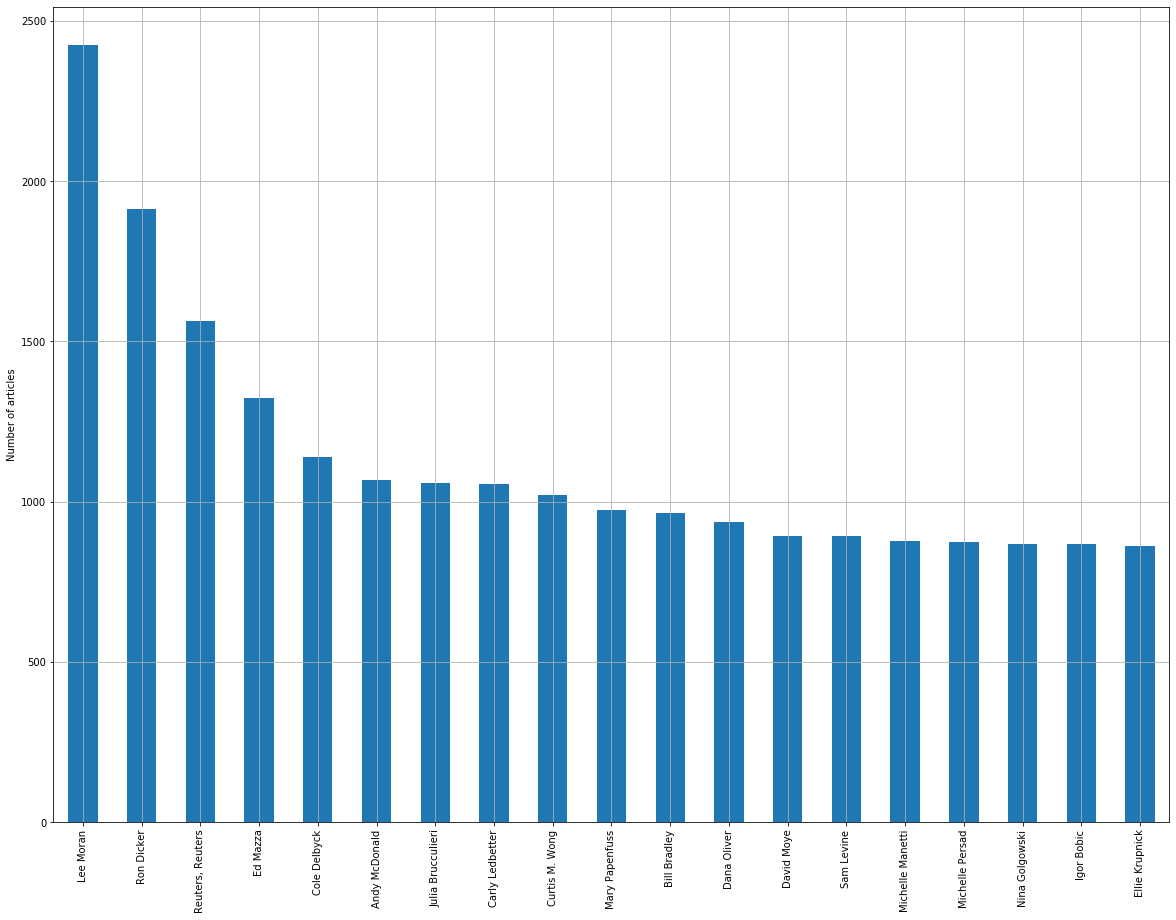

In [38]:
aut.plot( kind='bar', figsize=(20,15))
plt.grid()
plt.ylabel('Number of articles')
plt.savefig('bars1.pdf')

In [39]:
author_name = 'Ron Dicker'
author_number= df[df['authors'] == author_name]
df1 =author_number.groupby(by='category').count()

In [40]:
coun1=df1['headline']
print(coun1)

category
ARTS                1
ARTS & CULTURE      3
BLACK VOICES       40
BUSINESS           13
COLLEGE             1
COMEDY            402
CRIME              44
EDUCATION           1
ENTERTAINMENT     473
ENVIRONMENT         3
FIFTY               2
FOOD & DRINK        3
GOOD NEWS          22
GREEN              11
HEALTHY LIVING      3
IMPACT              1
LATINO VOICES       9
MEDIA              16
MONEY              20
PARENTING          47
PARENTS             9
POLITICS           41
QUEER VOICES       17
RELIGION            6
SCIENCE            18
SPORTS            380
STYLE               6
STYLE & BEAUTY      4
TASTE              12
TECH                5
THE WORLDPOST       6
TRAVEL              9
WEDDINGS            2
WEIRD NEWS        263
WELLNESS            6
WOMEN               9
WORLD NEWS          3
WORLDPOST           2
Name: headline, dtype: int64


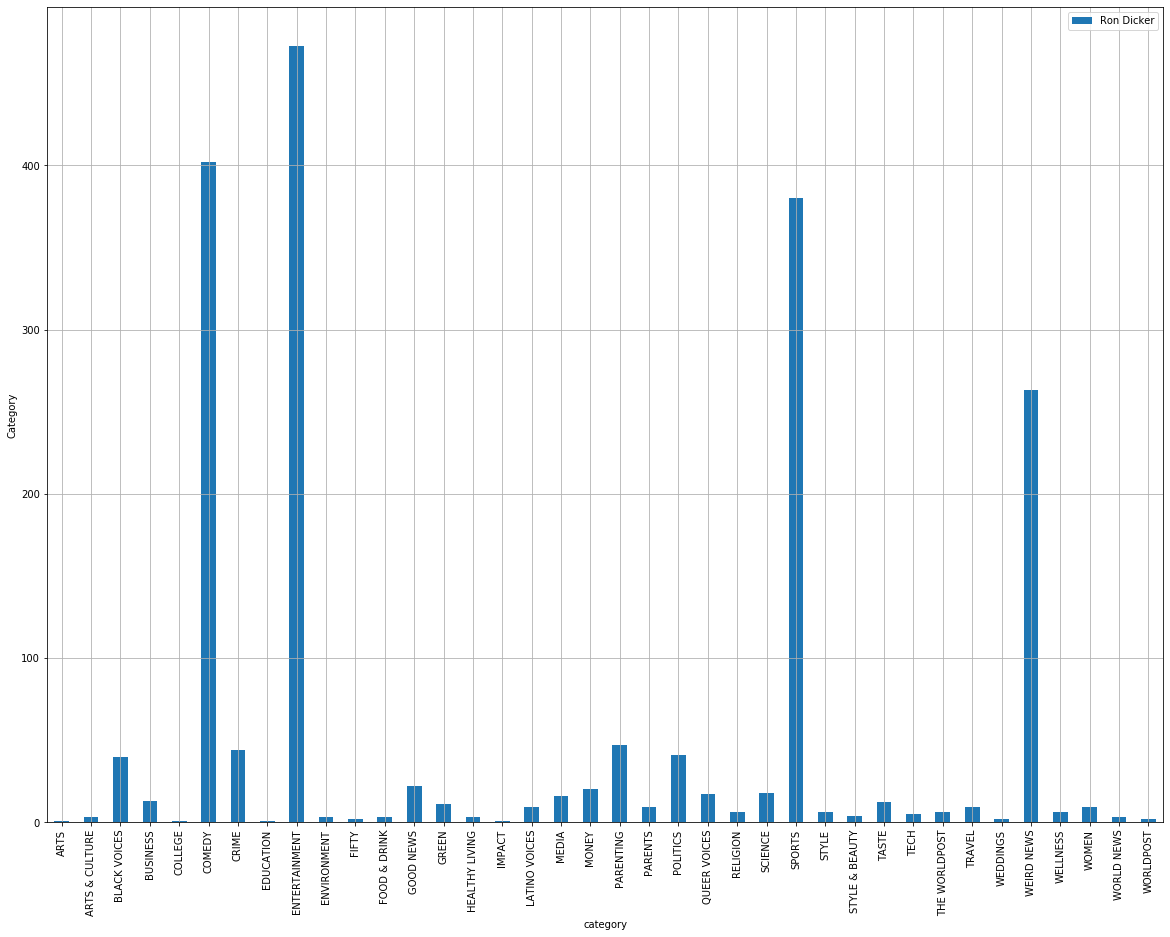

In [41]:
coun1.plot( kind='bar', figsize=(20,15),label='Ron Dicker')
plt.grid()
plt.legend()
plt.ylabel('Category')
plt.savefig('bars2.pdf')